In [17]:
import csv
import pandas as pd
import glob
import os
import numpy as np

In [ ]:
img = pd.read_csv('/home/shokoo/EchoView/video_class/files/video_model_labels/val_label_original (problematic).csv')
video = pd.read_csv('/home/shokoo/EchoView/video_class/files/video_model_labels/val_label_sw16.csv')

In [ ]:
img_paths = img['path'].value_counts().index.tolist()

In [ ]:
video[~video['path'].isin(img_paths)]

In [ ]:
valid_paths = video.groupby(['path']).agg({
    'label': lambda x: ', '.join(set(x)),
    'start' : list,
    'end' : list
}).reset_index()['path'].tolist()

In [ ]:
duplicated = video['path'].value_counts()
valid_paths = duplicated[duplicated > 0].index.tolist()
len(valid_paths)

In [ ]:
img[~img['path'].isin(valid_paths)]['path'].tolist()

In [ ]:
img[img['path'].isin(valid_paths)].reset_index().drop(['index'], axis=1).to_csv('val_label_original.csv',index=False)

In [4]:
original_path = '/home/shokoo/EchoView/Datasets/amyloid/processed/'

In [23]:
study_level_paths = glob.glob(os.path.join(f'{original_path}', '*/**/*'))

In [24]:
study_level_paths

['/home/shokoo/EchoView/Datasets/amyloid/processed/cardiac_stress_study_processed/BpjtCYA-RwOTIWaocpT7mg/86',
 '/home/shokoo/EchoView/Datasets/amyloid/processed/cardiac_stress_study_processed/BpjtCYA-RwOTIWaocpT7mg/90',
 '/home/shokoo/EchoView/Datasets/amyloid/processed/cardiac_stress_study_processed/BpjtCYA-RwOTIWaocpT7mg/9',
 '/home/shokoo/EchoView/Datasets/amyloid/processed/cardiac_stress_study_processed/BpjtCYA-RwOTIWaocpT7mg/55',
 '/home/shokoo/EchoView/Datasets/amyloid/processed/cardiac_stress_study_processed/BpjtCYA-RwOTIWaocpT7mg/57',
 '/home/shokoo/EchoView/Datasets/amyloid/processed/cardiac_stress_study_processed/BpjtCYA-RwOTIWaocpT7mg/91',
 '/home/shokoo/EchoView/Datasets/amyloid/processed/cardiac_stress_study_processed/BpjtCYA-RwOTIWaocpT7mg/25',
 '/home/shokoo/EchoView/Datasets/amyloid/processed/cardiac_stress_study_processed/BpjtCYA-RwOTIWaocpT7mg/82',
 '/home/shokoo/EchoView/Datasets/amyloid/processed/cardiac_stress_study_processed/BpjtCYA-RwOTIWaocpT7mg/16',
 '/home/sho

In [31]:
video_sizes = []

for study_level_path in study_level_paths:
    video_sizes.append(len(glob.glob(os.path.join(f'{study_level_path}', '*')))-1)

In [36]:
np.mean(video_sizes)

96.3531885073581

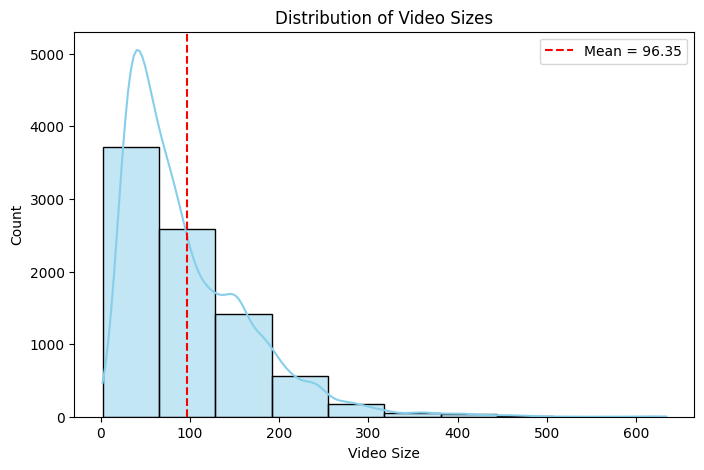

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Calculate mean
mean_size = np.mean(video_sizes)

# Plot
plt.figure(figsize=(8, 5))
sns.histplot(video_sizes, bins=10, kde=True, color='skyblue', edgecolor='black')
plt.axvline(mean_size, color='red', linestyle='--', label=f'Mean = {mean_size:.2f}')
plt.xlabel("Video Size")
plt.ylabel("Count")
plt.title("Distribution of Video Sizes")
plt.legend()
plt.show()


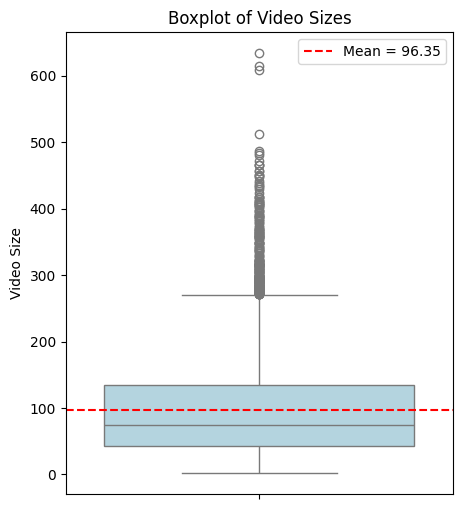

In [38]:
plt.figure(figsize=(5, 6))
sns.boxplot(y=video_sizes, color='lightblue')
plt.axhline(mean_size, color='red', linestyle='--', label=f'Mean = {mean_size:.2f}')
plt.ylabel("Video Size")
plt.title("Boxplot of Video Sizes")
plt.legend()
plt.show()


In [41]:
df = pd.DataFrame(video_sizes, columns=['size'])

In [47]:
df[df['size']<10].count()

size    15
dtype: int64